In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# predefined constant values

MODEL_URL = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2'

IMAGE_SIZE = 384

LABEL_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'

In [3]:
# downloading labels from the url

from urllib.request import urlopen

file = urlopen(LABEL_URL)

labels = []
for line in file:
    # print(line)
    labels.append(line.decode().strip()) # decode from bytes to str

labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [4]:
# multiclass classification with 1001 labels

len(labels)

1001

In [5]:
# function to adjust images

def adjust_images(img, size = IMAGE_SIZE):
    img = np.array(img)
    
    img = np.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))
    
    img = img.astype(np.float32)
    img = img / 255.0 # scaling the values for the model
    
    img = tf.image.resize_with_pad(img, size, size)
    
    return img

In [6]:
# testing the function

img = plt.imread('1.jpg')
adjusted_img = adjust_images(img)

adjusted_img.shape

TensorShape([1, 384, 384, 3])

In [7]:
# loading the model

model = hub.load(MODEL_URL)

# warmup input
inp_shape = [1, IMAGE_SIZE, IMAGE_SIZE, 3]
inp = tf.random.uniform(inp_shape, 0, 1)
model(inp)[0][:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.5139158 ,  0.19953789,  0.9507057 ,  0.9280454 ,  3.1101842 ],
      dtype=float32)>

In [8]:
#  out = model(inp)
out = tf.nn.softmax(model(inp))
out.numpy().sum()

1.0

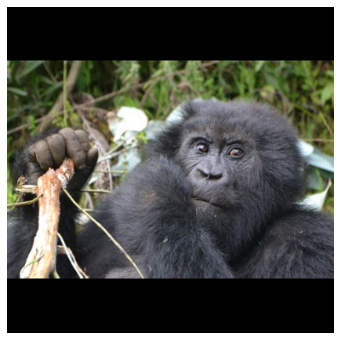

In [9]:
# classification

img = plt.imread('3.jpg')
adjusted_img = adjust_images(img)

plt.figure(figsize=(6,6))
plt.imshow(adjusted_img[0])
plt.axis('off')
plt.show()

In [10]:
# predict the classes

prob = tf.nn.softmax(model(adjusted_img)).numpy()
top_5 = np.argsort(prob)[0][::-1][:5]

rank = 1
for i in top_5:
    print('Rank {}: {} - {:.2f}%'.format(rank, labels[i], prob[0][i] * 100))
    rank += 1

Rank 1: orangutan - 90.44%
Rank 2: gorilla - 1.77%
Rank 3: gibbon - 0.20%
Rank 4: chimpanzee - 0.12%
Rank 5: capuchin - 0.09%
